# Predcting Price of Pre-Owned Cars

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Setting Dimensions for plot

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Reading csv file

In [3]:
cars_data = pd.read_csv('cars_sampled.csv')

# Creating Copy

In [4]:
cars = cars_data.copy()
print(cars)

            dateCrawled                                               name  \
0      30/03/2016 13:51                                       Zu_verkaufen   
1         7/3/2016 9:54                             Volvo_XC90_2.4D_Summum   
2         1/4/2016 0:57                                  Volkswagen_Touran   
3      19/03/2016 17:50                       Seat_Ibiza_1.4_16V_Reference   
4      16/03/2016 14:51  Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...   
5        2/4/2016 12:51           VW_Passat_35i_Facelift_Limousine_TÜV_Neu   
6        3/4/2016 11:06                                         Opel_astra   
7      24/03/2016 15:52                        Mercedes_Benz_CLK_Coupe_200   
8      28/03/2016 14:40  Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...   
9        5/4/2016 11:38                 Skoda_Octavia_2.0_TDI_DSG_Elegance   
10      21/03/2016 9:52                        Mercedes_Benz_A_140_Classic   
11     25/03/2016 12:40                                  Opel_As

# Structure of The Dtaset

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

# Summarizing data

In [6]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
pd.set_option("display.float_format", lambda x:'%.3f' % x)

In [8]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


# To display Maxmum set of columns

In [9]:
pd.set_option('display.max_columns', 500)

In [10]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


# Dropping unwanted columns

In [11]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

# Removing unwanted records

In [12]:
cars.drop_duplicates(keep='first',inplace=True)

# Data Cleaning

In [13]:
#Missing values of each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

# Variable YearOfRegstration

In [14]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()

In [15]:
sum(cars['yearOfRegistration'] > 2018)

26

In [16]:
sum(cars['yearOfRegistration'] > 1950)

49489

# Working Range - 1950 & 2018

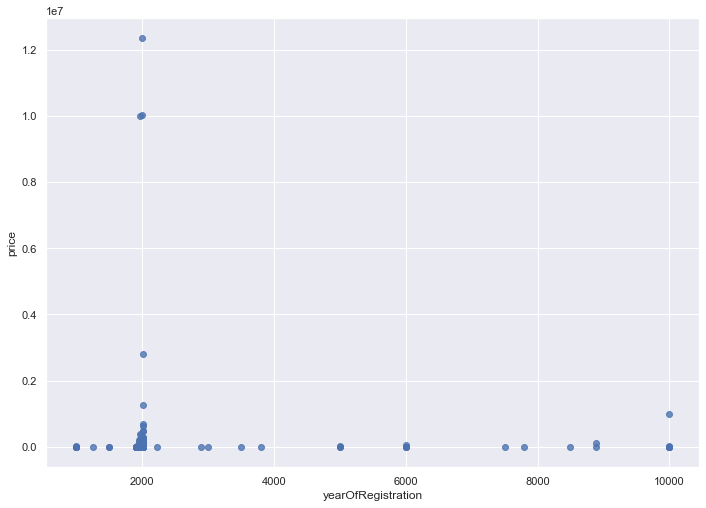

In [17]:
sns.regplot(x='yearOfRegistration', y='price', scatter=True,
           fit_reg=False, data=cars)

# Variable Price

In [18]:
price_count=cars['price'].value_counts().sort_index()

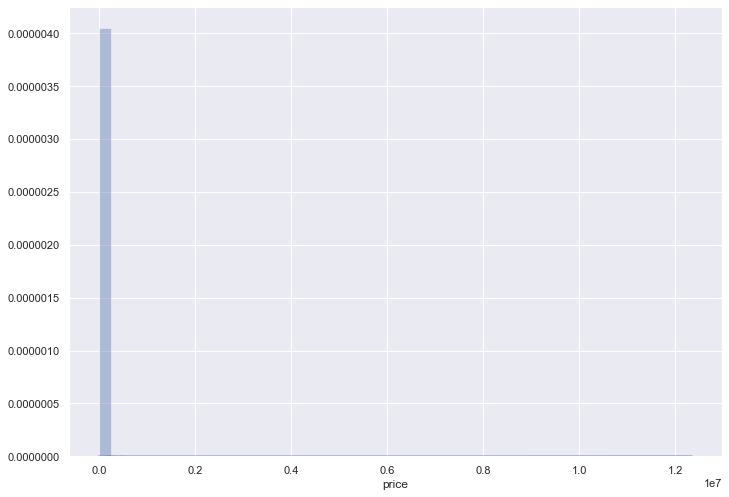

In [19]:
sns.distplot(cars['price'])

In [20]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

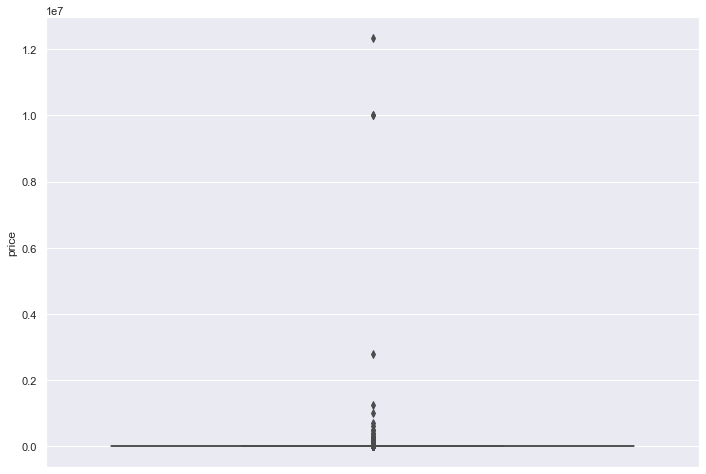

In [21]:
sns.boxplot(y=cars['price'])

In [22]:
sum(cars['price'] > 150000)

34

In [23]:
sum(cars['price'] < 100)

1748

# Variable powerPS

In [24]:
power_count=cars['powerPS'].value_counts().sort_index()

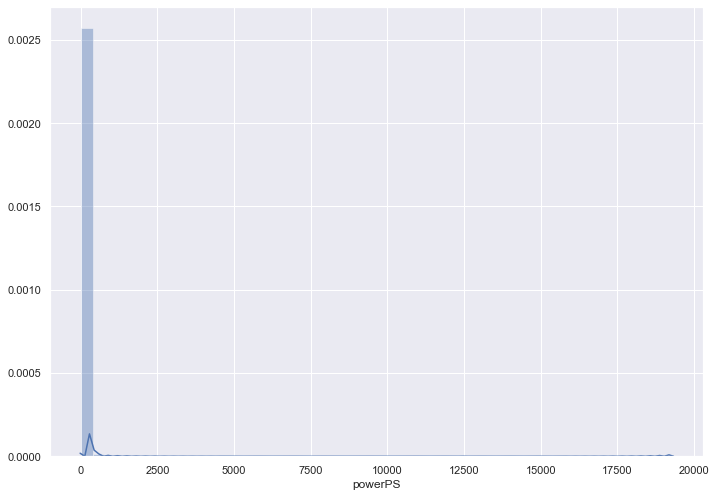

In [25]:
sns.distplot(cars['powerPS'])

In [26]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

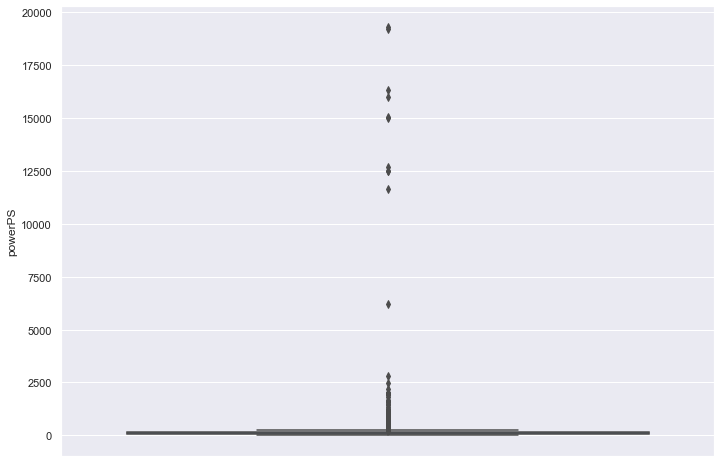

In [27]:
sns.boxplot(y=cars['powerPS'])

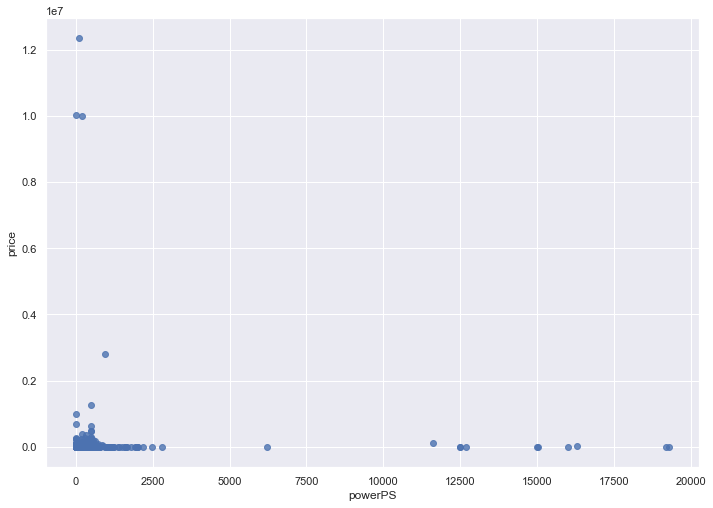

In [28]:
sns.regplot(x='powerPS', y='price', scatter=True,
           fit_reg=False, data=cars)

In [29]:
sum(cars['powerPS'] > 500)

115

In [30]:
sum(cars['powerPS'] > 150000)

0

# Working Range of Data

In [31]:
cars = cars[
      (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

# 6700 records are dropped 
#Further to simplify variable reducation
#Combining yearOfRegstration and monthOfRegistration

In [32]:
cars['monthOfRegistration']/=12

# Creating new variable Age by adding yearOfRegistration and monthOgRegistration

In [33]:
cars['Age']=(2018+cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean     4022.127
std         7.106
min      3969.250
25%      4017.830
50%      4022.250
75%      4026.750
max      4037.000
Name: Age, dtype: float64

# Dropping yearOfRegistration and MonthOfRegistration

In [34]:
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

# Visualizing parameter
#Age

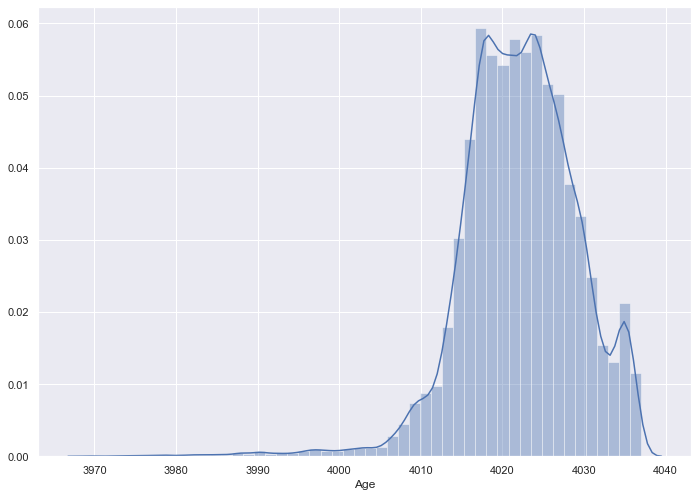

In [35]:
sns.distplot(cars['Age'])

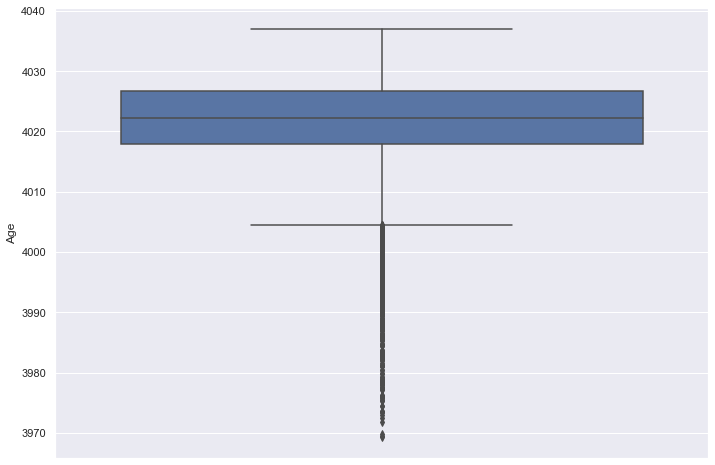

In [36]:
sns.boxplot(y=cars['Age'])

# Price

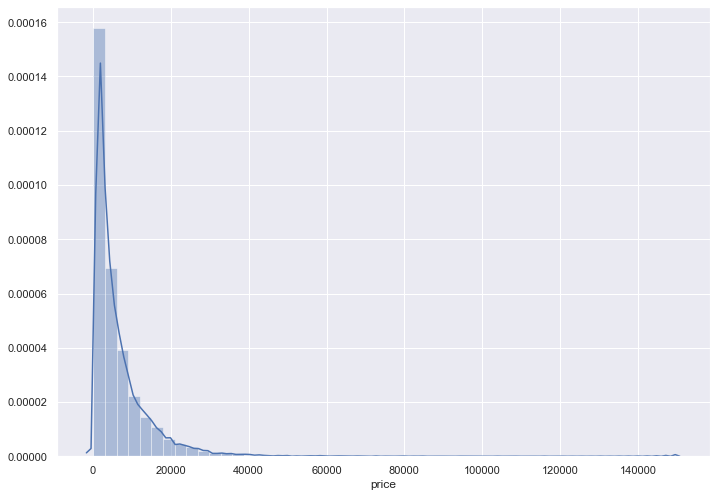

In [37]:
sns.distplot(cars['price'])

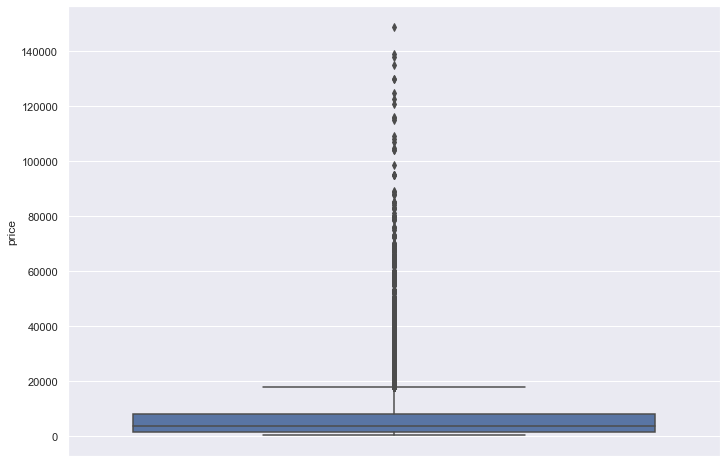

In [38]:
sns.boxplot(y=cars['price'])

# PowerPS

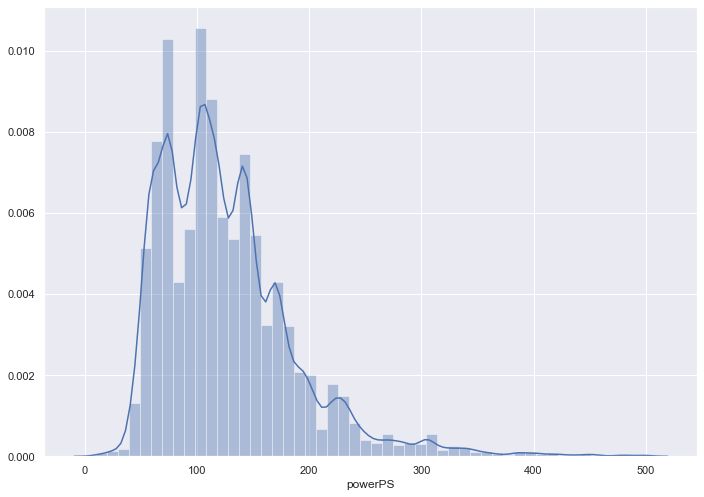

In [39]:
sns.distplot(cars['powerPS'])

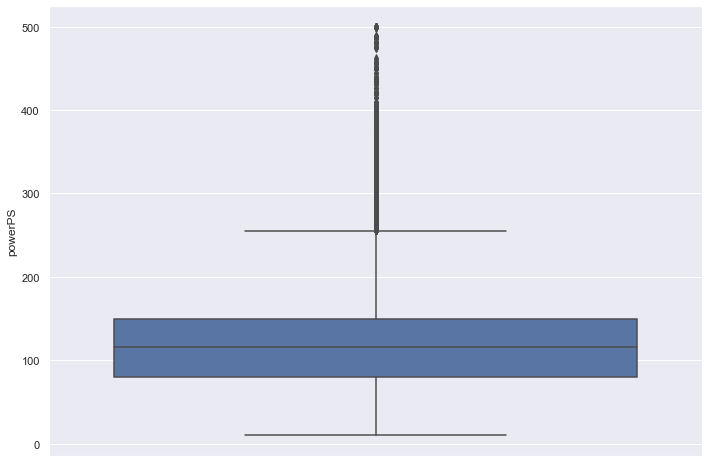

In [40]:
sns.boxplot(y=cars['powerPS'])

# Age vs price

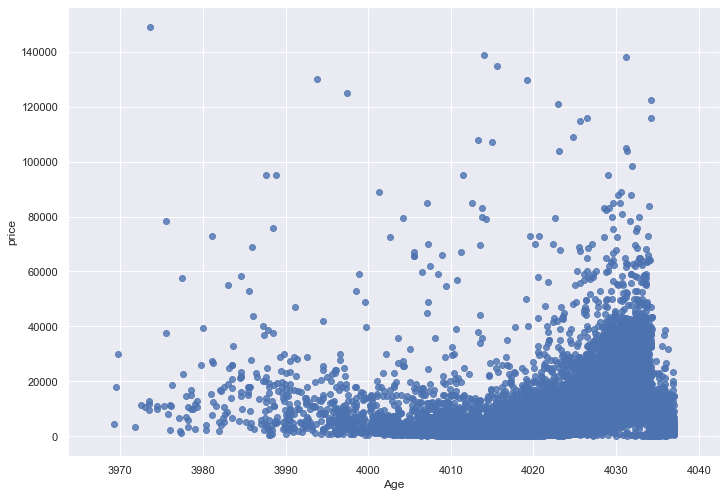

In [41]:
sns.regplot(x='Age',y='price', scatter=True,
          fit_reg=False, data=cars)


# pwerPS vs price

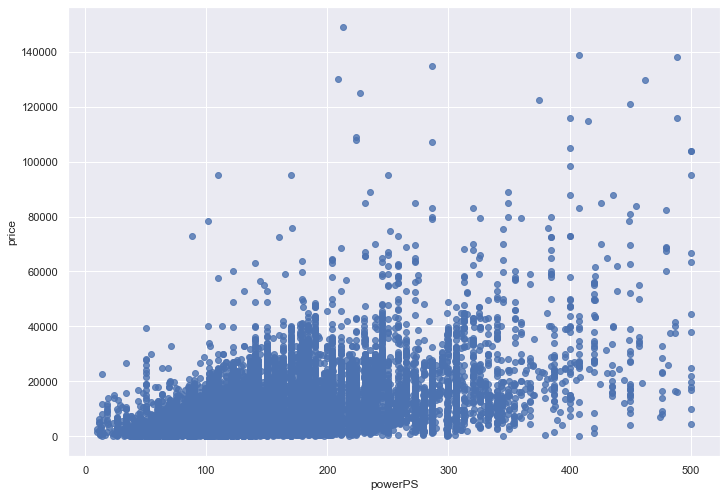

In [42]:
sns.regplot(x='powerPS',y='price',scatter=True,
           fit_reg=False,data=cars)

# Veriable Seller

In [43]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [44]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


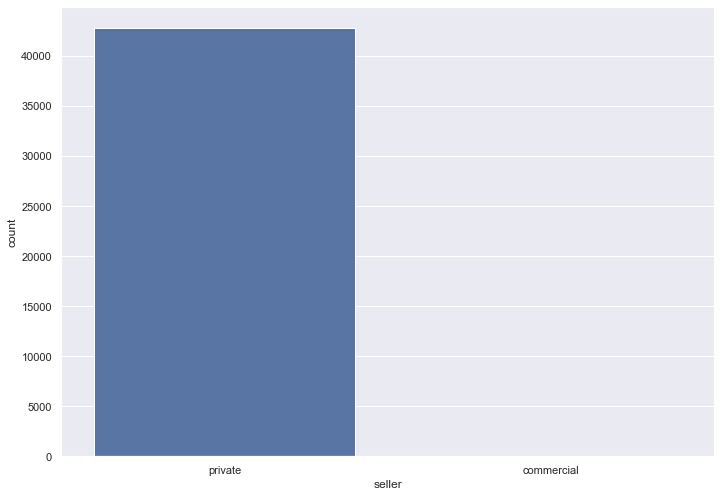

In [45]:
sns.countplot(x ='seller',data=cars)

# Variable offertype

In [46]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

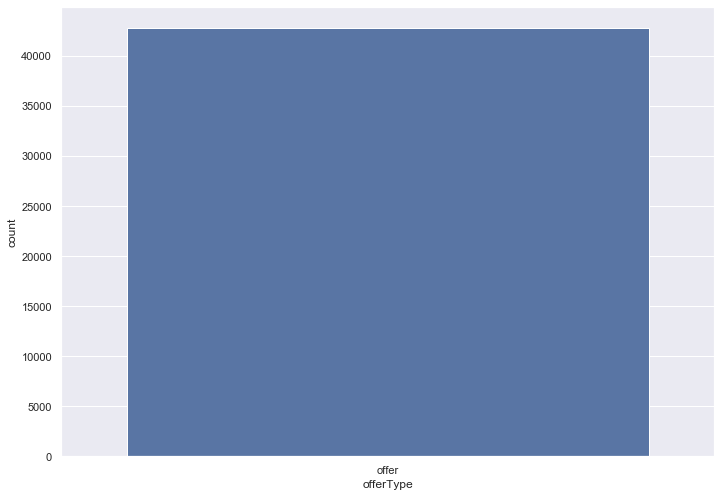

In [47]:
sns.countplot(x ='offerType',data=cars)

# Variable abtest

In [48]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [49]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


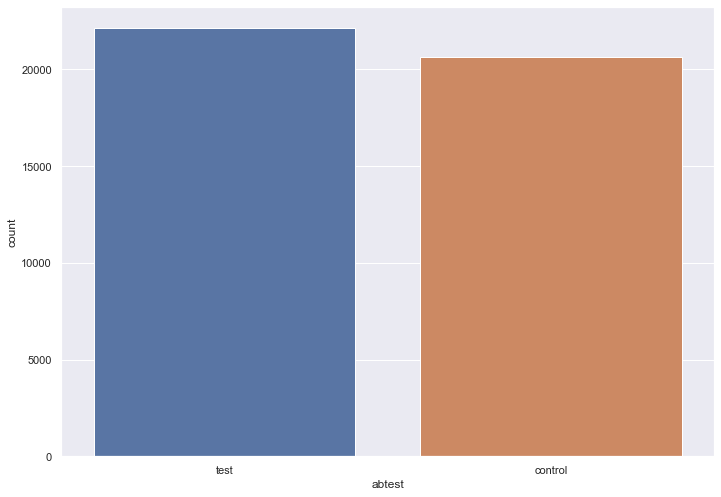

In [50]:
sns.countplot(x ='abtest',data=cars)

# Equally distributed

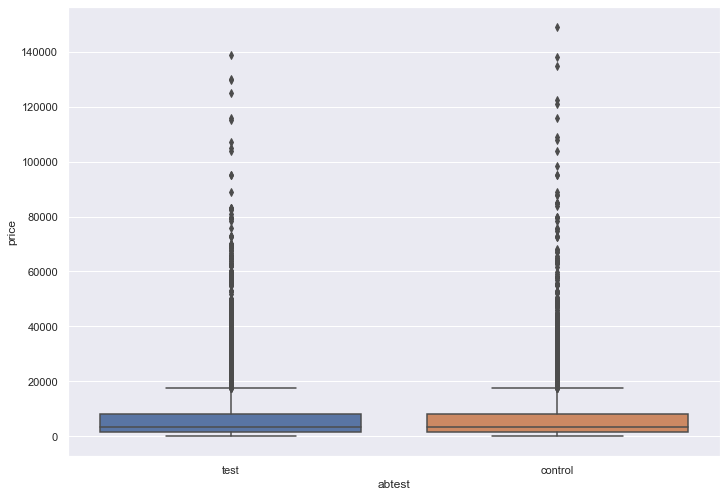

In [51]:
sns.boxplot(x ='abtest',y='price',data=cars)

# Variable vehiccleType

In [52]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [53]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


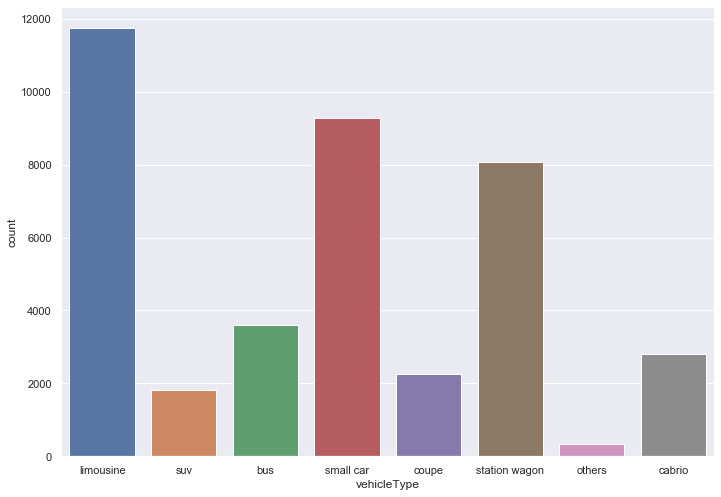

In [54]:
sns.countplot(x ='vehicleType',data=cars)

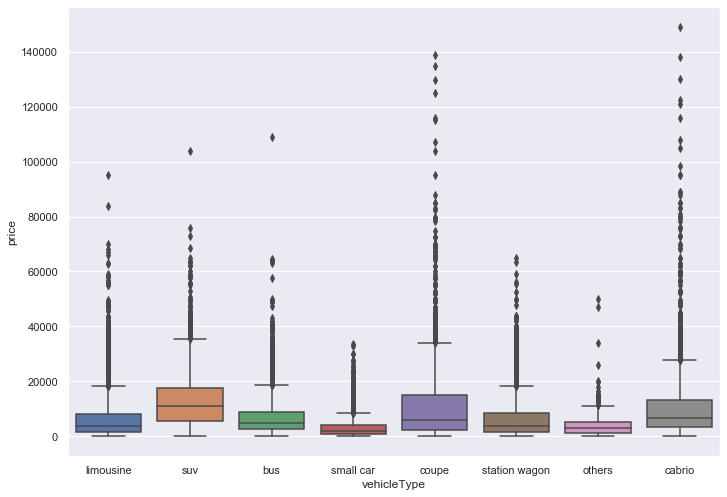

In [55]:
sns.boxplot(x ='vehicleType',y='price',data=cars)

# Variable gearbox

In [56]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [57]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


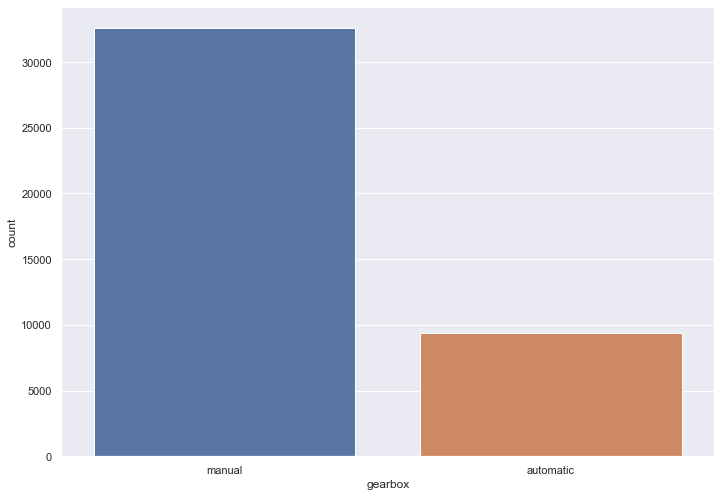

In [58]:
sns.countplot(x='gearbox',data=cars)

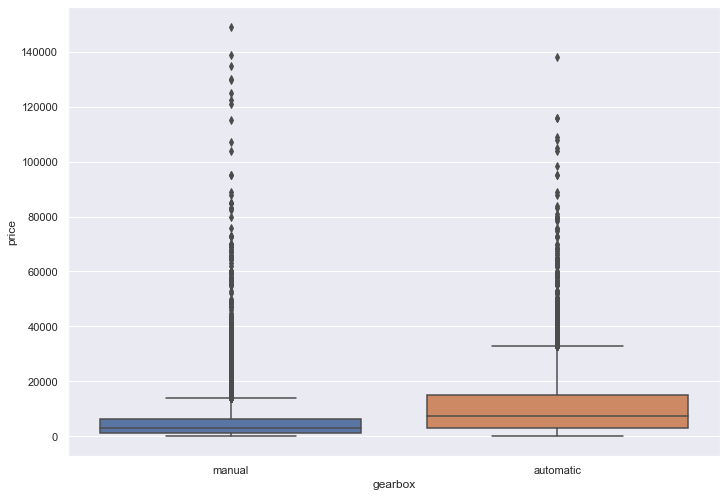

In [59]:
sns.boxplot(x='gearbox',y='price',data=cars)

# Variable model

In [60]:
cars['model'].value_counts()

golf                  3478
others                2900
3er                   2482
polo                  1500
corsa                 1386
astra                 1276
a4                    1230
passat                1200
c_klasse              1042
5er                   1013
e_klasse               907
a3                     826
a6                     737
focus                  701
fiesta                 637
transporter            630
2_reihe                603
fortwo                 532
1er                    527
a_klasse               497
vectra                 491
twingo                 479
clio                   437
3_reihe                437
touran                 422
mondeo                 388
punto                  363
ibiza                  354
megane                 340
zafira                 325
                      ... 
v60                     10
kalos                   10
nubira                   9
900                      9
r19                      8
crossfire                8
r

In [61]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
1_reihe,0.004
1er,0.013
200,0.000
2_reihe,0.015


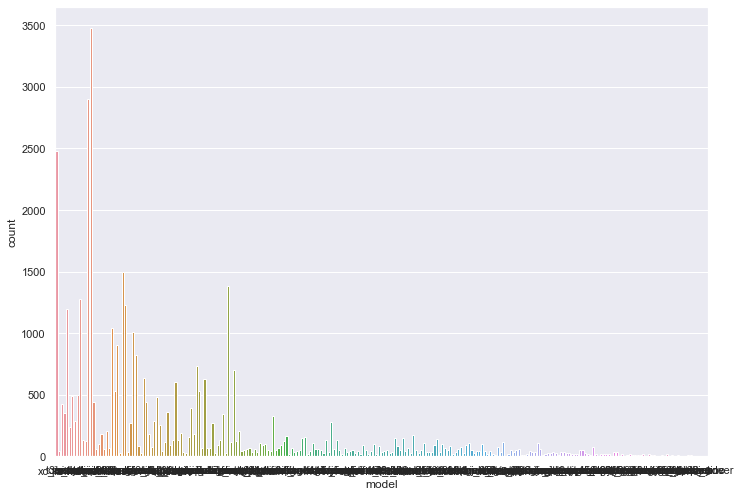

In [62]:
sns.countplot(x ='model',data=cars)

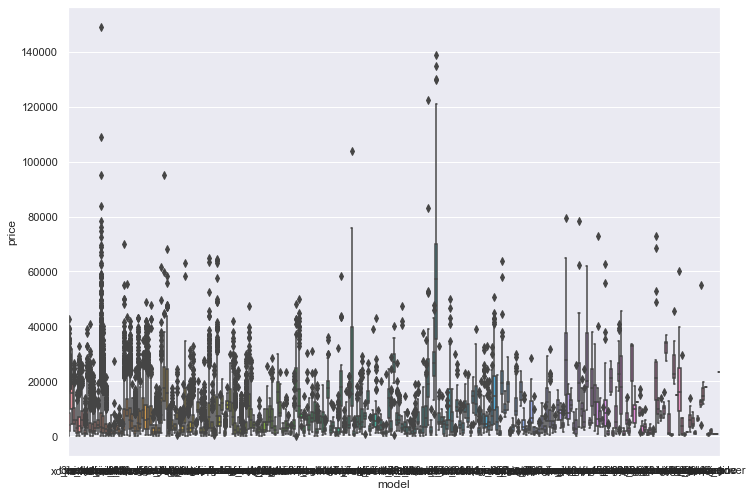

In [63]:
sns.boxplot(x='model',y='price',data=cars)

# Variable kilometer

In [64]:
cars['kilometer'].value_counts().sort_index(
)

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [65]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


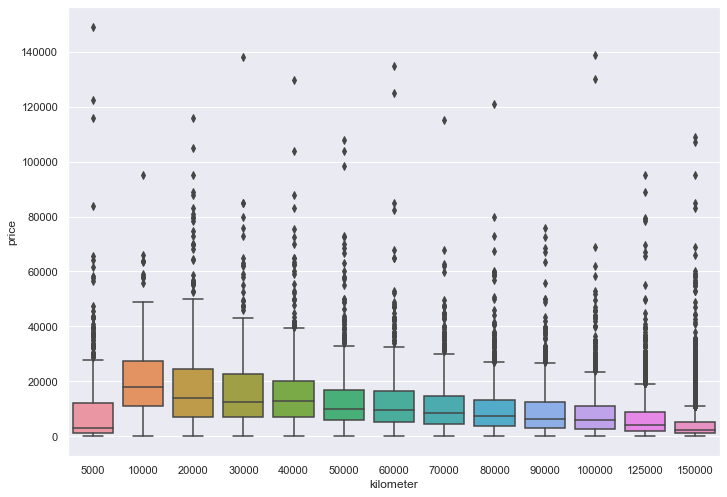

In [66]:
sns.boxplot(x='kilometer',y='price',data=cars)

In [67]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

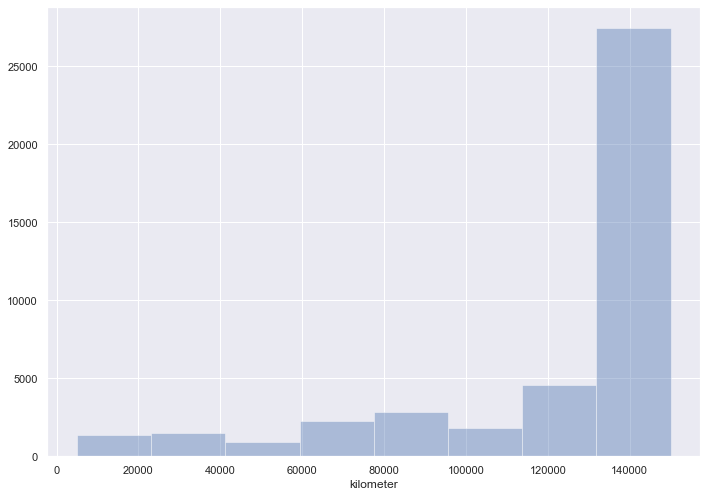

In [68]:
sns.distplot(cars['kilometer'],bins=8,kde=False)

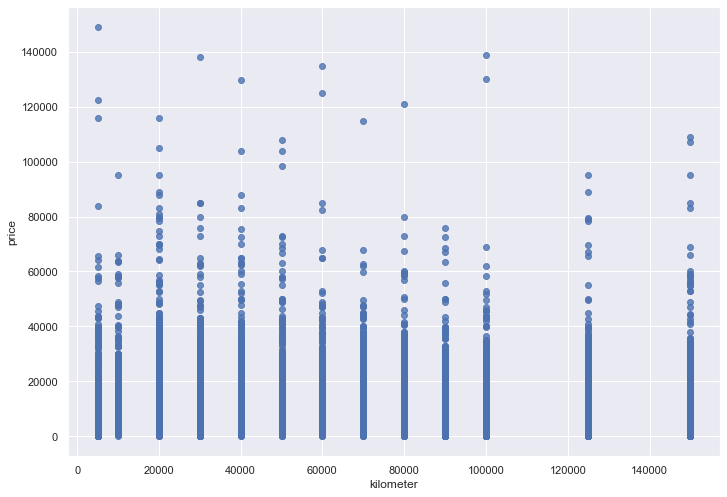

In [69]:
sns.regplot(x='kilometer',y='price',scatter=True,
           fit_reg=False,data=cars)

# Variable fuelType

In [70]:
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [71]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


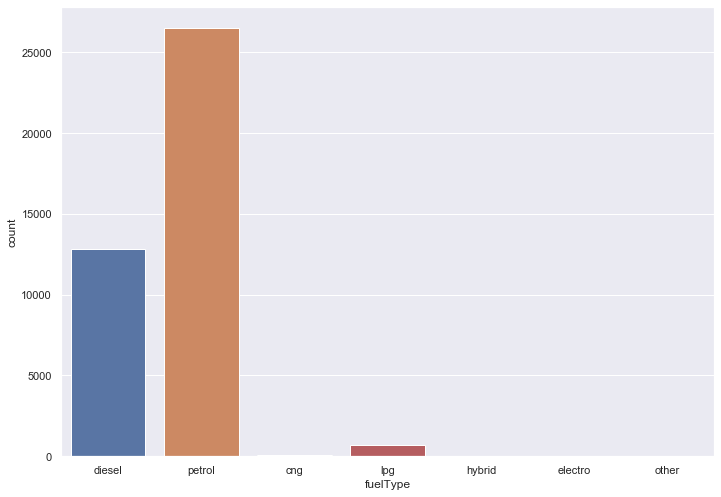

In [72]:
sns.countplot(x='fuelType',data=cars)

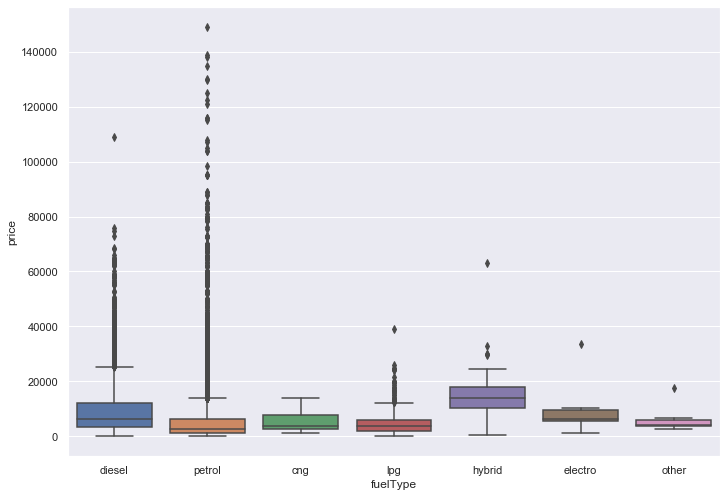

In [73]:
sns.boxplot(x='fuelType',y='price',data=cars)

# Variable Brand

In [74]:
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [75]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


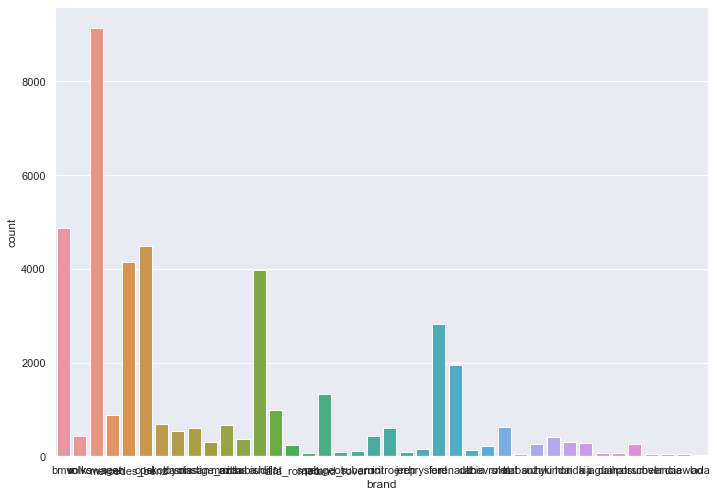

In [76]:
sns.countplot(x ='brand',data=cars)

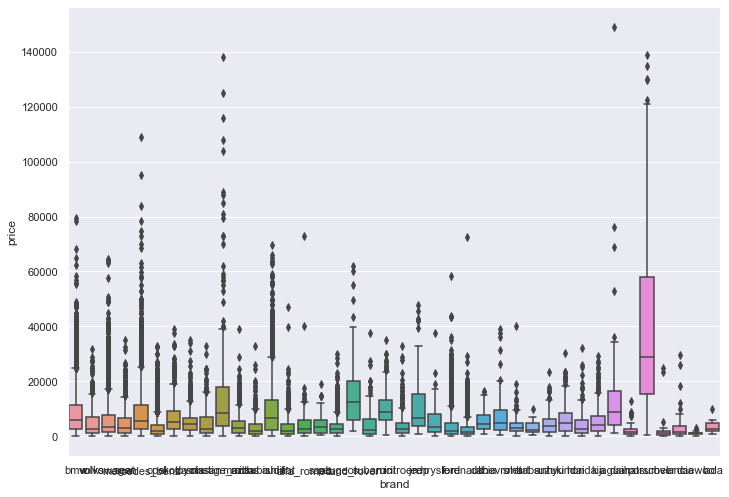

In [77]:
sns.boxplot(x ='brand',y='price',data=cars)

In [78]:
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [79]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


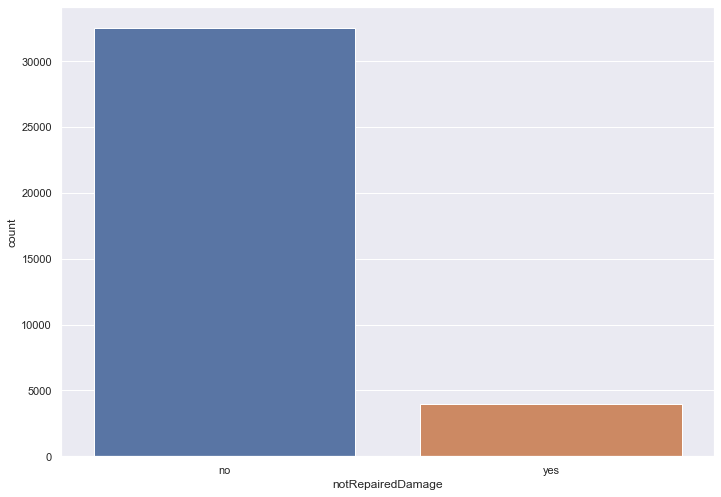

In [80]:
sns.countplot(x='notRepairedDamage',data=cars)

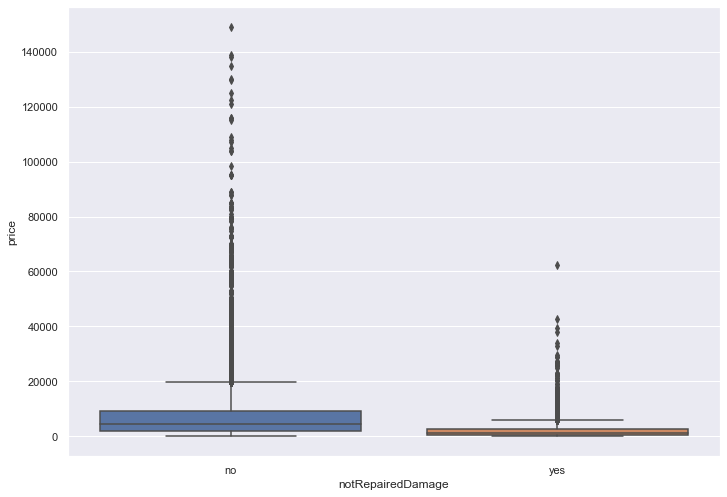

In [81]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

# Removing insignificanr variables

In [82]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col,axis=1)

In [83]:
cars_copy = cars.copy()

# Correlation

In [84]:
cars_select1=cars.select_dtypes(exclude=[object])

In [85]:
correlation=cars_select1.corr()

In [86]:
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,0.339
powerPS,0.575,1.000,-0.016,0.154
kilometer,-0.440,-0.016,1.000,-0.293
Age,0.339,0.154,-0.293,1.000


In [87]:
cars_select1.corr().loc()[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.339
Name: price, dtype: float64

# OMITTING MISSING VALUES

In [88]:
cars_omit=cars.dropna(axis=0)

# Converting categorical variables to dummy variables

In [89]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

# IMORTING NECESSARY LIBRARIES

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
from sklearn.metrics import mean_squared_error

# MODEL BUILDING DATA

# Separating Input & Output features

In [94]:
x1 = cars_omit.drop(['price'], axis='columns',inplace=False)
y1 = cars_omit['price']

# Plotting the variable price

In [95]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15B13070>,
      dtype=object)

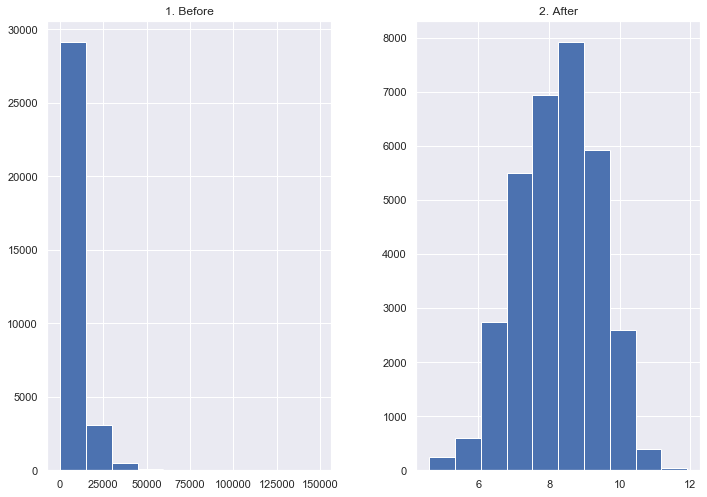

In [96]:
prices.hist()

# Transforming price as a Logarithimic value

In [97]:
y1 = np.log(y1)

# Splitting data nto test and train

In [98]:
X_train, x_test, Y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state= 3)

In [99]:
print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


# Finding the mean for the test data value

In [100]:
base_pred = np.mean(y_test)

In [101]:
print(base_pred)

8.249615787653337


# Repeating same value till length of test data

In [102]:
base_pred = np.repeat(base_pred, len(y_test))

# Finding the RMSE

In [103]:
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))

In [104]:
print(base_root_mean_square_error)

1.1274483657478247


# LINEAR REGRESSION  WITH OMITTED DATA
#setting intercept as true

In [105]:
lgr=LinearRegression(fit_intercept=True)

In [106]:
#Model
model_linl=lgr.fit(X_train,Y_train)

In [107]:
#Predicting model on test set
cars_predictions_linl = lgr.predict(x_test)

In [108]:
#Computing MSE & RMSE
lin_mse1 = mean_squared_error(y_test,cars_predictions_linl )

In [109]:
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5441502090118209


In [110]:
#R sqeared value
r2_lin_test1=model_linl.score(x_test,y_test)


In [111]:
r2_lin_train1=model_linl.score(X_train,Y_train)

In [112]:
print(r2_lin_test1,r2_lin_train1)

0.7670598891577005 0.7808815227376363


In [113]:
#Regression diagonostics- Residuual plot analysis
residuals1=y_test-cars_predictions_linl

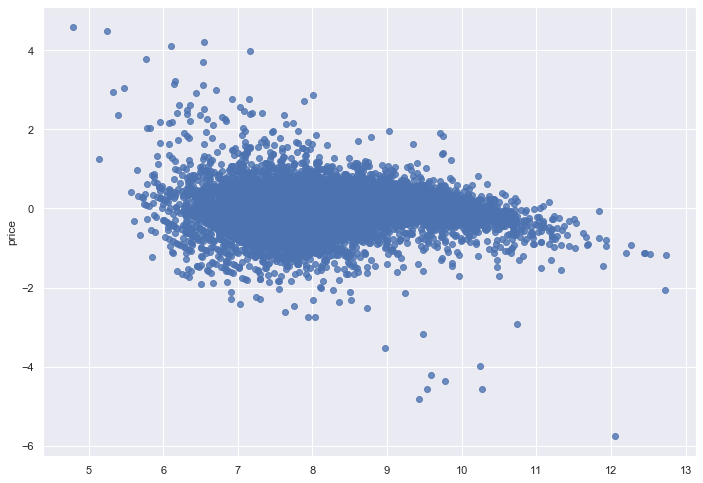

In [114]:
sns.regplot(x=cars_predictions_linl,y=residuals1,scatter=True,
           fit_reg=False,data=cars)

In [115]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.544
min       -5.751
25%       -0.259
50%        0.040
75%        0.296
max        4.582
Name: price, dtype: float64

# RANDOM FOREST WITH OMITTED DATA

In [116]:
#Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                          max_depth=100,min_samples_split=10,
                          min_samples_leaf=4,random_state=1)

In [117]:
#Model
model_rf1=rf.fit(X_train,Y_train)

In [118]:
#Predicting model on test set
cars_prediction_rf1= rf.predict(x_test)

In [119]:
#Computing MSE & RMSE
rf_mse1= mean_squared_error(y_test, cars_prediction_rf1)
rf_rmse1= np.sqrt(rf_mse1)
print(rf_rmse1)

0.4321533625084564


In [120]:
#R Squard value
r2_rf_test1=model_rf1.score(x_test,y_test)
r2_rf_train1=model_rf1.score(X_train,Y_train)
print(r2_rf_test1,r2_rf_train1)

0.8530794754700337 0.9214581453462128


# MODEL BUILDING WITH IMPUTED DATA

In [121]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                          if x.dtype=='float' else \
                          x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()


price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [122]:
#Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [123]:
x2 = cars_imputed.drop(['price'], axis='columns',inplace=False)

In [124]:
y2 = cars_imputed['price']

In [125]:
#Plotting with variable price
prices1 = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16D3A710>,
      dtype=object)

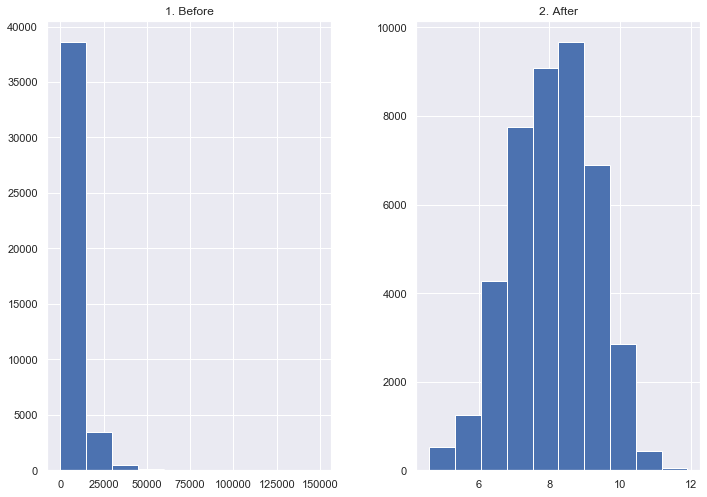

In [126]:
prices1.hist()

In [127]:
y2 =np.log(y2)

In [128]:
X_train1, x_test1, Y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state= 3)

In [129]:
print(X_train1.shape, x_test1.shape, Y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


# BASELINE MODEL FOR IMPUTED DATA

In [130]:
#Finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


In [131]:
#Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

In [132]:
#Finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1,base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


# LINEAR REGRESSION WITH IMPUTED DATA

In [134]:
#Setting Intercept as True
lgr2=LinearRegression(fit_intercept=True)

In [135]:
#Model
model_lin2=lgr2.fit(X_train1,Y_train1)

In [136]:
#Predicting model on test set
cars_predictions_lin2 =lgr2.predict(x_test1)

In [137]:
#Computing RMSE & MSE
lin_mse2 = mean_squared_error(y_test1,cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6466396292568123


# RANDOM FOREST WITH MPUTED DATA

In [138]:
#Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                          max_depth=100,min_samples_split=10,
                          min_samples_leaf=4,random_state=1)

In [139]:
#Model
model_rf2=rf2.fit(X_train1,Y_train1)

In [141]:
#Predicting model on test set
cars_predictions_rf2 = rf2.predict(x_test1)


In [142]:
#MSE & RMSE
rf_mse2 = mean_squared_error(y_test1,cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.489659849556619


In [143]:
#R squared value
r2_rf_test2=model_rf2.score(x_test1,y_test1)

In [145]:
r2_rf_train2=model_rf2.score(X_train1,Y_train1)
print(r2_rf_test2,r2_rf_train2)

0.8302388973528664 0.9046605421928362
